THE ATOM OF COMMPUTATIOM

In [2]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /private/var/folders/kj/7g8cnzys4ml6wzjg5w7cxwxh0000gn/T/pip-req-build-23d88hpm
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /private/var/folders/kj/7g8cnzys4ml6wzjg5w7cxwxh0000gn/T/pip-req-build-23d88hpm
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 09212862c48a09c842a1e11d4df339d28a6d6cef


     |████████████████████████████████| 6.4 MB 165 kB/s eta 0:00:01
     |████████████████████████████████| 8.6 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 240 kB 593 kB/s eta 0:00:01
     |████████████████████████████████| 54 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 147 kB/s eta 0:00:01
     |████████████████████████████████| 17.8 MB 331 kB/s eta 0:00:01
     |████████████████████████████████| 49 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 961 kB 469 kB/s eta 0:00:01
     |████████████████████████████████| 49 kB 585 kB/s eta 0:00:01
     |████████████████████████████████| 95 kB 534 kB/s eta 0:00:01
     |████████████████████████████████| 112 kB 3.2 MB/s eta 0:00:01
  Created wheel for qiskit-textbook: filename=qiskit_textbook-0.1.0-py3-none-any.whl size=17541 sha256=cd9c629cb3230d7054840c248afb67bf4bf3b63a6987a5d784dab3b781560846
  Stored in director

Note: you may need to restart the kernel to use updated packages.


In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In [2]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

In [47]:
qc_encode = QuantumCircuit(4,2)

number=[1,1]

if number[0]==1:
    qc_encode.x(0) 
if number[1]==1:
    qc_encode.x(1)    

qc_encode.cx(0,2)
qc_encode.cx(1,2)
qc_encode.ccx(0,1,3)
qc_encode.measure(2,0)
qc_encode.measure(3,1)
qc_encode.draw(initial_state=True)

┌───┐                     
q_0: |0>┤ X ├──■─────────■────────
        ├───┤  │         │        
q_1: |0>┤ X ├──┼────■────■────────
        └───┘┌─┴─┐┌─┴─┐  │  ┌─┐   
q_2: |0>─────┤ X ├┤ X ├──┼──┤M├───
             └───┘└───┘┌─┴─┐└╥┘┌─┐
q_3: |0>───────────────┤ X ├─╫─┤M├
                       └───┘ ║ └╥┘
 c: 0 2/═════════════════════╩══╩═
                             0  1

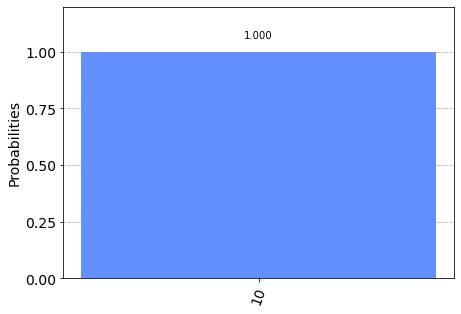

In [49]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)

In [44]:
import qiskit.tools.jupyter
%qiskit_version_table

REPRESENTING QUBIT STATES

In [20]:
from qiskit.visualization import plot_bloch_vector
from math import sqrt, pi, exp

In [15]:
sim = Aer.get_backend('aer_simulator') # Tell Qiskit how to simulate our circuit

In [35]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [1/sqrt(2),1j/sqrt(2)]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result

In [31]:
out_state = result.get_statevector()
print(out_state) # Display the output state vector

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


In [32]:
qc.measure_all()
qc.draw()

┌──────────────────────────────┐ ░  ░ ┌─┐
     q: ┤ Initialize(0.70711,0.70711j) ├─░──░─┤M├
        └──────────────────────────────┘ ░  ░ └╥┘
meas: 1/═══════════════════════════════════════╩═
                                               0

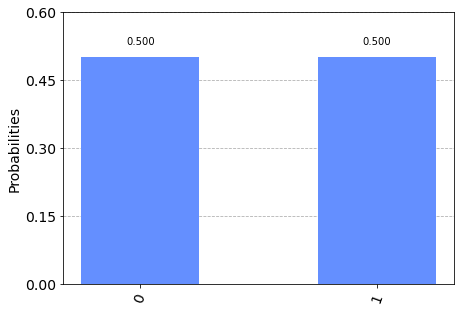

In [33]:
counts = result.get_counts()
plot_histogram(counts)

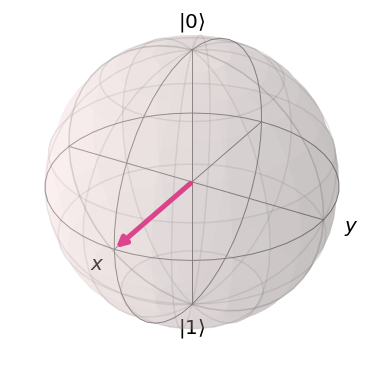

In [36]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi/2,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

In [37]:
from qiskit.visualization import plot_bloch_multivector

In [57]:
qc = QuantumCircuit(2)
qc.h(0)
qc.p(pi/2,0)
# See the circuit:
qc.draw()

┌───┐┌────────┐
q_0: ┤ H ├┤ P(π/2) ├
     └───┘└────────┘
q_1: ───────────────

In [58]:
# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [62]:
qc = QuantumCircuit(2)
qc.h(0)
qc.p(pi/2,1)
# See the circuit:
qc.draw()

┌───┐   
q_0: ──┤ H ├───
     ┌─┴───┴──┐
q_1: ┤ P(π/2) ├
     └────────┘

In [255]:
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

In [83]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.h(1)
# Apply a CNOT:
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘

In [84]:
# Let's see the result:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

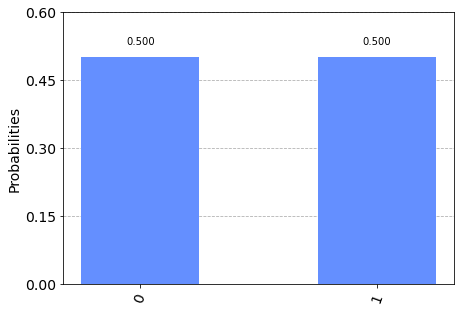

In [85]:
plot_histogram(result.get_counts())

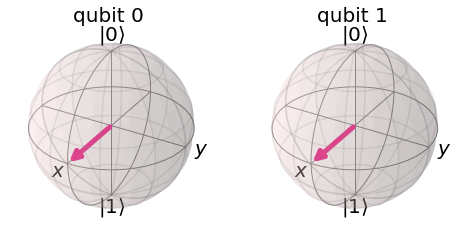

In [86]:
plot_bloch_multivector(final_state)

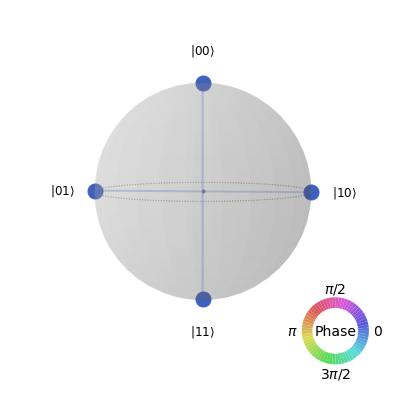

In [87]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(final_state)

In [187]:
#TELEPORTATION
import cmath
qc = QuantumCircuit(3,2) 
initial_state = [complex(1/sqrt(3),0),complex(0,sqrt(2/3))]   
qc.initialize(initial_state, 0)
qc.h(1)
qc.cx(1,2)
qc.cx(0,1)
qc.h(0)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌─────────────────────────────┐          ┌───┐┌─┐
q_0: ┤ Initialize(0.57735,0.8165j) ├───────■──┤ H ├┤M├
     └────────────┬───┬────────────┘     ┌─┴─┐└┬─┬┘└╥┘
q_1: ─────────────┤ H ├───────────────■──┤ X ├─┤M├──╫─
                  └───┘             ┌─┴─┐└───┘ └╥┘  ║ 
q_2: ───────────────────────────────┤ X ├───────╫───╫─
                                    └───┘       ║   ║ 
c: 2/═══════════════════════════════════════════╩═══╩═
                                                1   0

In [188]:
# Let's see the result:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

if final_state[1]!= 0:
    x=(final_state[1],-final_state[5])
elif final_state[2]!= 0:
    x=(final_state[6],final_state[2])
elif final_state[3]!= 0:
    x=(final_state[7],-final_state[3]) 
else:
    x=(final_state[0],final_state[4])
x
# We recover the same vector in Bob's channel, ie the 3rd Qubit!

((0.5773502691896257+0j), (9.999199243478974e-17+0.8164965809277259j))

In [225]:
initial_states=[[[1,0],[1,0]],[[1,0],[0,1]],[[0,1],[1,0]],[[0,1],[0,1]]]

In [234]:
#SWAP
i=initial_states[1]
qc = QuantumCircuit(2) 
qc.initialize(i[0], 0)
qc.initialize(i[1], 1)
qc.cx(1,0)
qc.cx(0,1)
qc.cx(1,0)
qc.draw()

┌─────────────────┐┌───┐     ┌───┐
q_0: ┤ Initialize(1,0) ├┤ X ├──■──┤ X ├
     ├─────────────────┤└─┬─┘┌─┴─┐└─┬─┘
q_1: ┤ Initialize(0,1) ├──■──┤ X ├──■──
     └─────────────────┘     └───┘

In [235]:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [252]:
from math import sqrt, pi, exp
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cp(-pi/2,0,1)
qc.draw()

┌───┐          
q_0: ┤ H ├─■────────
     ├───┤ │P(-π/2) 
q_1: ┤ X ├─■────────
     └───┘

In [253]:
#### svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [254]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
from math import pi
qc = QuantumCircuit(2)
c = 0
t = 1

In [273]:
qc = QuantumCircuit(2) #SWAP with cx's
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)
# See the circuit:
qc.draw()

┌───┐     
q_0: ──■──┤ X ├──■──
     ┌─┴─┐└─┬─┘┌─┴─┐
q_1: ┤ X ├──■──┤ X ├
     └───┘     └───┘

In [274]:
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>